In [1]:
# Este codigo corresponde a una NN para clasificacion de senales de trafico
# Marzo 17, 2023

# Definición de rutas

In [2]:
data_path = 'D:\MaIE\Semestre3\RL\Data\TrafficSignals'
models_path = 'models'
train_data_path = 'D:\MaIE\Semestre3\RL\Data\TrafficSignals\Train'
labels_path = 'D:\MaIE\Semestre3\RL\Data\TrafficSignals\Test.csv'

In [3]:
import os
from matplotlib.image import imread
from skimage.transform import resize
# Organizamos los datos de entranamiento
data = []
labels = []
classes = 43 # la cantidad posible de etiquetas
lista = os.listdir(train_data_path)
lista.remove('.DS_Store')
for i in lista: # for loop para las carpetas
    dir = train_data_path+'/'+i
    for j in os.listdir(dir): # for loop para las imagenes dentro de la carpeta
        ima_path = dir+'/'+j
        imagen = imread(ima_path,-1)
        imagen = resize(imagen,(32,32))
        data.append(imagen)
        labels.append(i)

In [4]:
import numpy as np
data1 = np.array(data)
labels1 = np.array(labels)
print(data1.shape,labels1.shape)

(39209, 32, 32, 3) (39209,)


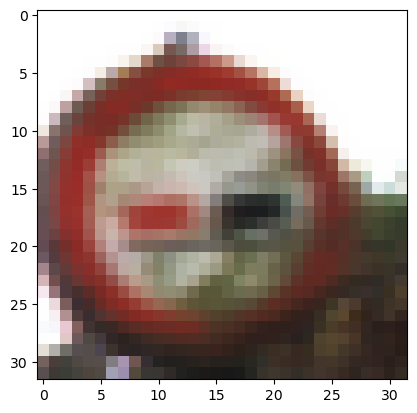

In [5]:
import matplotlib.pyplot as plt
plt.imshow(imagen)

In [6]:
# organizar los datos de testeo
import pandas as pd
import os
data = []
labels = []
Table = pd.read_csv(labels_path)
Table['Path']
for j in range(0,Table['Path'].shape[0]):
    ima_path =os.path.join(data_path, Table['Path'][j])
    imagen = imread(ima_path,-1)
    imagen = resize(imagen,(32,32))
    data.append(imagen)
    labels.append(Table['ClassId'][j])

In [7]:
data2 = np.array(data)
labels2 = np.array(labels)
print(data2.shape,labels2.shape)

(12630, 32, 32, 3) (12630,)


In [8]:
# Organizamos entradas y salidas de la NN
X_train = data1
y_train = labels1
X_test = data2
y_test = labels2

In [9]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train,43)
y_test = to_categorical(y_test,43)
print(y_test.shape)

(12630, 43)


In [10]:
# definimos la arquitectura de la NN
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.layers.experimental.preprocessing import Rescaling

model = Sequential()
model.add(Conv2D(filters = 32, kernel_size=(5,5),activation = 'relu', input_shape =(32,32,3)))
model.add(Conv2D(filters = 32, kernel_size=(5,5),activation = 'relu'))
model.add(Conv2D(filters = 64, kernel_size=(3,3),activation = 'relu'))
model.add(Conv2D(filters = 64, kernel_size=(3,3),activation = 'relu'))
model.add(Flatten())
model.add(Dense(256,activation = 'relu'))
model.add(Dense(43,activation='softmax'))

In [11]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [12]:
from tensorflow.keras.callbacks import EarlyStopping
epochs = 15
mycallbacks = [EarlyStopping(monitor='val_loss', patience=20)]
history = model.fit(X_train,y_train,batch_size=64,epochs=epochs,validation_data=(X_test,y_test), callbacks=mycallbacks)

Epoch 1/15
613/613 [==============================] - 35s 57ms/step - loss: 0.4057 - accuracy: 0.8959 - val_loss: 0.2631 - val_accuracy: 0.9332
Epoch 2/15
613/613 [==============================] - 34s 55ms/step - loss: 0.0502 - accuracy: 0.9864 - val_loss: 0.3112 - val_accuracy: 0.9335
Epoch 3/15
613/613 [==============================] - 35s 56ms/step - loss: 0.0261 - accuracy: 0.9922 - val_loss: 0.2532 - val_accuracy: 0.9523
Epoch 4/15
613/613 [==============================] - 34s 55ms/step - loss: 0.0212 - accuracy: 0.9936 - val_loss: 0.3426 - val_accuracy: 0.9479
Epoch 5/15
613/613 [==============================] - 34s 55ms/step - loss: 0.0191 - accuracy: 0.9944 - val_loss: 0.3788 - val_accuracy: 0.9485
Epoch 6/15
613/613 [==============================] - 34s 56ms/step - loss: 0.0140 - accuracy: 0.9958 - val_loss: 0.2889 - val_accuracy: 0.9564
Epoch 7/15
613/613 [==============================] - 34s 55ms/step - loss: 0.0120 - accuracy: 0.9965 - val_loss: 0.2746 - val_accuracy:

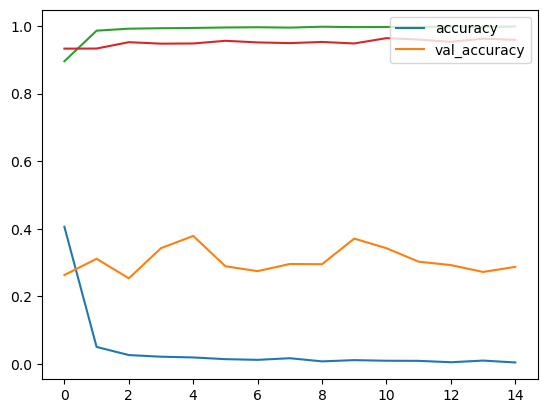

In [13]:
# Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'], loc='upper right')

# Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'], loc='upper right')

In [14]:
# Importamos paquete para guardar y/o cargar
from tensorflow.keras.models import load_model

In [15]:
model_path = os.path.join(models_path, 'teacher.h5')
model.save(model_path) # se guarda la red entrenada

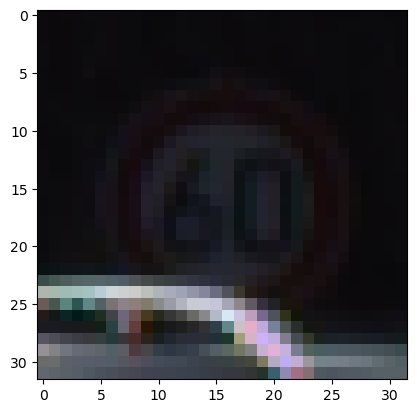

In [16]:
# Tomemos una imagen de referencia
Prueba = X_test[23]
plt.imshow(Prueba)
Clasificacion_trafico = load_model(model_path)

In [17]:
# Ahora probamos la NN
R = Clasificacion_trafico(Prueba.reshape(1,32,32,3))
print(np.argmax(R))

3
